In [ ]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 4.3 MB/s 
     |████████████████████████████████| 23.2 MB 1.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import scipy as scipy
from sklearn_extra.cluster import KMedoids

In [ ]:
df = pd.read_csv('sample_data/points1.csv')

In [ ]:
df

,Name,x,y
0,A,2,10
1,B,2,5
2,C,8,4
3,D,5,8
4,E,7,5
5,F,6,4
6,G,1,2
7,H,4,9


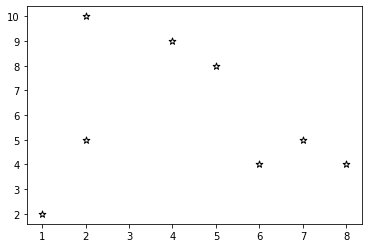

In [ ]:
# plot
plt.scatter(
   df[['x']], df[['y']],
   c='white', marker='*',
   edgecolor='black', s=50
)
plt.show()

In [ ]:
km = KMedoids(
    n_clusters=2, random_state=0, init="k-medoids++"
)
kmedoids = km.fit_predict(df[['x', 'y']])


In [ ]:
kmedoids

array([0, 1, 1, 0, 1, 1, 1, 0])

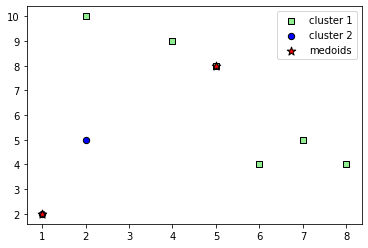

In [ ]:
dff = df[['x', 'y']]

# clusters
c_1 = dff[kmedoids==0]
c_2 = dff[kmedoids==1]
# c_3 = dff[kmedoids==2]
# c_4 = dff[kmedoids==3]
# c_5 = dff[kmedoids==4]
# c_6 = dff[kmedoids==5]

plt.scatter(
    c_1[['x']], c_1[['y']],
    s=40, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    c_2[['x']], c_2[['y']],
    s=40, c='blue',
    marker='o', edgecolor='black',
    label='cluster 2'
)




# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=80, marker='*',
    c='red', edgecolor='black',
    label='medoids'
)

plt.legend(scatterpoints=1)
plt.show()

29.202164976965996
16.572765534998144
9.640986324787455
8.22677276241436
6.812559200041264
5.39834563766817
3.1622776601683795


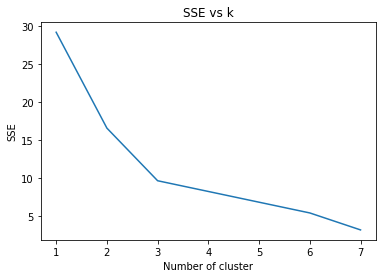

In [ ]:
sse = {}
for k in range(1, df.shape[0]):
    kmedoids = KMedoids(n_clusters=k, max_iter=300).fit(df[['x', 'y']])
    df["clusters"] = kmedoids.labels_
    sse[k] = kmedoids.inertia_ 
    print(sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('SSE vs k')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

**K-MEDOIDS**